# BBH

In [1]:
from ler.rates import LeR
from ler.utils import get_param_from_json
import numpy as np
import matplotlib.pyplot as plt

Setting multiprocessing start method to 'fork'


In [19]:
ler = LeR(npool=6, verbose=False)

In [20]:
ler.selecting_n_lensed_detectable_events(
    size=100000, batch_size=200000,snr_threshold=8.0, num_img=2,output_jsonfile='n_lensed_detectable_bbh_po.json',meta_data_file='n_lensed_detectable_bbh_po_meta.json', resume=True);

collected number of detectable events =  0


  5%|██▌                                                    | 9420/200000 [00:05<00:43, 4401.43it/s]

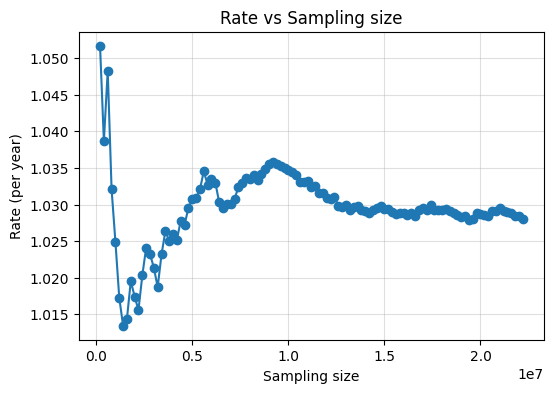

In [ ]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_lensed_detectable_bbh_po_meta.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [ ]:
# average rate
idx = np.where(meta_data['events_total'] > 1.5e7)
avg_rate = np.mean(meta_data['total_rate'][idx])
print('Average rate:', avg_rate, 'per year')

Average rate: 1.0288641633832236 per year


In [ ]:
lensed_param = get_param_from_json('ler_data/n_lensed_detectable_bbh_po.json')

In [ ]:
# select out only detectable events
# here we will consider only 1st and 2nd image

# 1st image and 2nd image
lensed_param_1 = {}
lensed_param_2 = {}
lensed_param_3 = {}
lensed_param_4 = {}

for key, value in lensed_param.items():
    if np.shape(np.shape(value))[0]==2:
        lensed_param_1[key] = value[:,0]
        lensed_param_2[key] = value[:,1]
        lensed_param_3[key] = value[:,2]
        lensed_param_4[key] = value[:,3]

# remove nan values in lensed_param_3
idx_nan_3 = np.isnan(lensed_param_3['effective_geocent_time'])
idx_nan_4 = np.isnan(lensed_param_4['effective_geocent_time'])

In [ ]:
lensed_param_1.keys()

dict_keys(['x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'effective_luminosity_distance', 'effective_geocent_time', 'optimal_snr_net', 'L1', 'H1', 'V1'])

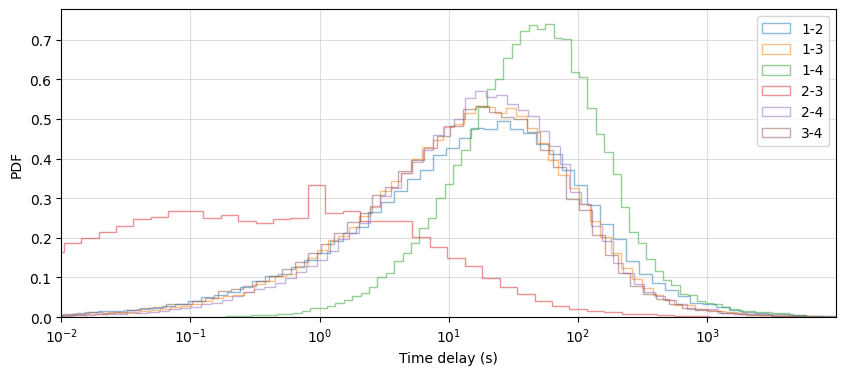

In [ ]:
dt_12 =  (lensed_param_2['effective_geocent_time']-lensed_param_1['effective_geocent_time'])/(24*60*60)  # in days
dt_13 =  (lensed_param_3['effective_geocent_time']-lensed_param_1['effective_geocent_time'])/(24*60*60)  # in days
dt_13 = dt_13[~idx_nan_3]
dt_14 =  (lensed_param_4['effective_geocent_time']-lensed_param_1['effective_geocent_time'])/(24*60*60)  # in days
dt_14 = dt_14[~idx_nan_4]
dt_23 =  (lensed_param_3['effective_geocent_time']-lensed_param_2['effective_geocent_time'])/(24*60*60)  # in days
dt_23 = dt_23[~idx_nan_3]
dt_24 =  (lensed_param_4['effective_geocent_time']-lensed_param_2['effective_geocent_time'])/(24*60*60)  # in days
dt_24 = dt_24[~idx_nan_4]
dt_34 =  (lensed_param_4['effective_geocent_time']-lensed_param_3['effective_geocent_time'])/(24*60*60)  # in days
dt_34 = dt_34[(~idx_nan_4) & (~idx_nan_3)]

plt.figure(figsize=(10, 4))
plt.hist(np.log10(dt_12), bins=100, histtype='step', density=True, label='1-2', alpha=0.5)
plt.hist(np.log10(dt_13), bins=100, histtype='step', density=True, label='1-3', alpha=0.5)
plt.hist(np.log10(dt_14), bins=100, histtype='step', density=True, label='1-4', alpha=0.5)
plt.hist(np.log10(dt_23), bins=100, histtype='step', density=True, label='2-3', alpha=0.5)
plt.hist(np.log10(dt_24), bins=100, histtype='step', density=True, label='2-4', alpha=0.5)
plt.hist(np.log10(dt_34), bins=100, histtype='step', density=True, label='3-4', alpha=0.5)
plt.xlabel('Time delay (s)')
plt.ylabel('PDF')
plt.xlim(-2, 4)
plt.xticks(np.arange(-2, 4, 1), [r'$10^{%d}$' % i for i in np.arange(-2, 4, 1)])
plt.grid(alpha=0.4)
plt.legend()
plt.show()

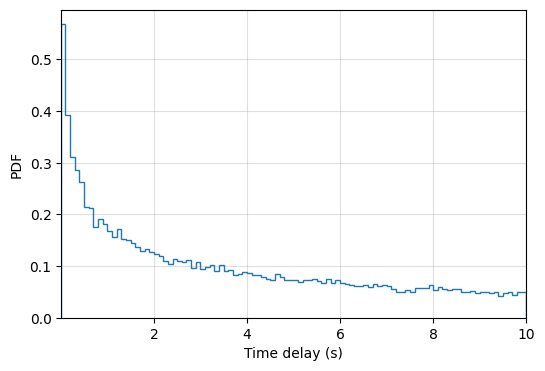

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(dt_12[dt_12<10], bins=100, histtype='step', density=True)
plt.xlabel('Time delay (s)')
plt.ylabel('PDF')
plt.xlim(0.01, 10)
plt.grid(alpha=0.4)
plt.show()

In [1]:
from ler.rates import LeR
from ler.utils import get_param_from_json
import numpy as np
import matplotlib.pyplot as plt

ler = LeR(
    npool=8,
    snr_type='ann',
    waveform_approximant='IMRPhenomXPHM',
    verbose=False,
    gwsnr_verbose=True,
    spin_zero=False,
    spin_precession=True,
    )

In [2]:
ler.selecting_n_lensed_detectable_events(
    size=10000, 
    batch_size=10000,
    snr_threshold=[8.,8.],
    num_img=[1,1],
    output_jsonfile='n_lensed_detectable_bbh_po_spin_ann.json',meta_data_file='n_lensed_detectable_bbh_po_spin_meta_ann.json',
    resume=False,
    snr_recalculation=True,
    snr_threshold_recalculation=[5.5, 5.5]);

collected number of detectable events =  0


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.71s/it]


ValueError: X has 5 features, but StandardScaler is expecting 4 features as input.

In [1]:
import numpy as np
from gwsnr import GWSNR

# innitialize the class for pdet calculation
gwsnr = GWSNR(snr_type='ann', waveform_approximant='IMRPhenomXPHM', pdet=True)

# set the GW parameters
mass_1 = np.array([5, 10.,50.,200.])
ratio = np.array([1, 0.8,0.5,0.2])
luminosity_distance = np.array([1000, 2000, 3000, 4000])
a_1 = np.array([0.1, 0.2, 0.3, 0.4])
a_2 = np.array([0.1, 0.2, 0.3, 0.4])
tilt_1 = np.array([0.1, 0.2, 0.3, 0.4])
tilt_2 = np.array([0.1, 0.2, 0.3, 0.4])
phi_12 = np.array([0.1, 0.2, 0.3, 0.4])
phi_jl = np.array([0.1, 0.2, 0.3, 0.4])

# pdet calculation with ANN
gwsnr.snr(mass_1=mass_1, mass_2=mass_1*ratio, luminosity_distance=luminosity_distance, a_1=a_1, a_2=a_2, tilt_1=tilt_1, tilt_2=tilt_2, phi_12=phi_12, phi_jl=phi_jl)

psds not given. Choosing bilby's default psds
You have chosen default ANN model. This model only works for gwsnr default parameters.
ANN model will be save and loaded from 'ann_data' directory. To create new model, follow instructions from the 'gwsnr' documentation.
Please be patient while the interpolator is generated for partialscaledSNR.
Interpolator will be loaded for L1 detector from ./interpolator_pickle/L1/partialSNR_dict_1.pickle
Interpolator will be loaded for H1 detector from ./interpolator_pickle/H1/partialSNR_dict_1.pickle
Interpolator will be loaded for V1 detector from ./interpolator_pickle/V1/partialSNR_dict_1.pickle

Chosen GWSNR initialization parameters:

npool:  4
snr type:  ann
waveform approximant:  IMRPhenomXPHM
sampling frequency:  2048.0
minimum frequency (fmin):  20.0
mtot=mass1+mass2
min(mtot):  2.0
max(mtot) (with the given fmin=20.0): 184.98599853446768
detectors:  ['L1', 'H1', 'V1']
psds:  [PowerSpectralDensity(psd_file='None', asd_file='/Users/phurailatpam

/Users/phurailatpamhemantakumar/anaconda3/envs/ler/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.4.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


ValueError: X has 5 features, but StandardScaler is expecting 4 features as input.

In [ ]:
lensed_param = get_param_from_json('ler_data/n_lensed_detectable_bbh_po_spin.json')

In [ ]:
lensed_param.keys()

dict_keys(['zl', 'zs', 'sigma', 'q', 'theta_E', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'effective_luminosity_distance', 'effective_geocent_time', 'optimal_snr_net', 'L1', 'H1', 'V1'])

In [ ]:
from ler.rates import LeR
from ler.utils import get_param_from_json
import numpy as np
import matplotlib.pyplot as plt

ler = LeR(
    npool=8,
    snr_type='inner_product',
    waveform_approximant='IMRPhenomXPHM',
    verbose=False,
    gwsnr_verbose=True,
    spin_zero=False,
    spin_precession=True,
    )

In [ ]:
ler.selecting_n_lensed_detectable_events(
    size=100000, 
    batch_size=100000,
    snr_threshold=[8.,8.],
    num_img=[1,1],
    output_jsonfile='n_lensed_detectable_bbh_po_spin.json',meta_data_file='n_lensed_detectable_bbh_po_spin_meta.json',
    resume=True);

collected number of detectable events =  60379.0


100%|██████████████████████████████████████████████████████████| 9697/9697 [00:14<00:00, 679.22it/s]


collected number of events =  60849.0
total number of events =  12601000
total lensed rate (yr^-1): 1.0956928941779178


100%|██████████████████████████████████████████████████████████| 9859/9859 [00:14<00:00, 686.82it/s]


collected number of events =  61339.0
total number of events =  12701000
total lensed rate (yr^-1): 1.095819909765125


100%|██████████████████████████████████████████████████████████| 9796/9796 [00:14<00:00, 685.71it/s]


collected number of events =  61801.0
total number of events =  12801000
total lensed rate (yr^-1): 1.0954486291524994


100%|██████████████████████████████████████████████████████████| 9794/9794 [00:14<00:00, 687.25it/s]


collected number of events =  62284.0
total number of events =  12901000
total lensed rate (yr^-1): 1.095452452874808


100%|██████████████████████████████████████████████████████████| 9775/9775 [00:14<00:00, 686.01it/s]


collected number of events =  62756.0
total number of events =  13001000
total lensed rate (yr^-1): 1.0952642376200388


100%|██████████████████████████████████████████████████████████| 9815/9815 [00:14<00:00, 688.58it/s]


collected number of events =  63237.0
total number of events =  13101000
total lensed rate (yr^-1): 1.095234771381856


100%|██████████████████████████████████████████████████████████| 9698/9698 [00:14<00:00, 682.93it/s]


collected number of events =  63693.0
total number of events =  13201000
total lensed rate (yr^-1): 1.0947760434197726


100%|██████████████████████████████████████████████████████████| 9805/9805 [00:14<00:00, 682.17it/s]


collected number of events =  64222.0
total number of events =  13301000
total lensed rate (yr^-1): 1.0955695274121109


100%|██████████████████████████████████████████████████████████| 9748/9748 [00:14<00:00, 682.79it/s]


collected number of events =  64689.0
total number of events =  13401000
total lensed rate (yr^-1): 1.0953013974640506


100%|██████████████████████████████████████████████████████████| 9833/9833 [00:14<00:00, 677.62it/s]


collected number of events =  65200.0
total number of events =  13501000
total lensed rate (yr^-1): 1.0957767207398803


100%|██████████████████████████████████████████████████████████| 9683/9683 [00:14<00:00, 675.84it/s]


collected number of events =  65653.0
total number of events =  13601000
total lensed rate (yr^-1): 1.0952774506836314


100%|██████████████████████████████████████████████████████████| 9790/9790 [00:14<00:00, 689.60it/s]


collected number of events =  66147.0
total number of events =  13701000
total lensed rate (yr^-1): 1.0954644721919098


100%|████████████████████████████████████████████████████████| 10053/10053 [00:14<00:00, 689.96it/s]


collected number of events =  66627.0
total number of events =  13801000
total lensed rate (yr^-1): 1.095418608578098


100%|██████████████████████████████████████████████████████████| 9650/9650 [00:14<00:00, 681.83it/s]


collected number of events =  67081.0
total number of events =  13901000
total lensed rate (yr^-1): 1.0949490123096086


100%|██████████████████████████████████████████████████████████| 9705/9705 [00:14<00:00, 679.64it/s]


collected number of events =  67551.0
total number of events =  14001000
total lensed rate (yr^-1): 1.094745423376538


100%|██████████████████████████████████████████████████████████| 9724/9724 [00:14<00:00, 682.34it/s]


collected number of events =  68023.0
total number of events =  14101000
total lensed rate (yr^-1): 1.0945769045780536


100%|██████████████████████████████████████████████████████████| 9734/9734 [00:14<00:00, 676.70it/s]


collected number of events =  68496.0
total number of events =  14201000
total lensed rate (yr^-1): 1.0944267370823149


100%|██████████████████████████████████████████████████████████| 9810/9810 [00:14<00:00, 688.38it/s]


collected number of events =  68983.0
total number of events =  14301000
total lensed rate (yr^-1): 1.0945007970369263


100%|██████████████████████████████████████████████████████████| 9717/9717 [00:14<00:00, 685.12it/s]


collected number of events =  69421.0
total number of events =  14401000
total lensed rate (yr^-1): 1.0938017812724896


100%|██████████████████████████████████████████████████████████| 9959/9959 [00:14<00:00, 692.44it/s]


collected number of events =  69893.0
total number of events =  14501000
total lensed rate (yr^-1): 1.0936444183756533


100%|██████████████████████████████████████████████████████████| 9589/9589 [00:14<00:00, 682.21it/s]


collected number of events =  70353.0
total number of events =  14601000
total lensed rate (yr^-1): 1.0933027280692043


100%|██████████████████████████████████████████████████████████| 9592/9592 [00:14<00:00, 676.69it/s]


collected number of events =  70814.0
total number of events =  14701000
total lensed rate (yr^-1): 1.092981120828661


100%|██████████████████████████████████████████████████████████| 9864/9864 [00:14<00:00, 689.57it/s]


collected number of events =  71286.0
total number of events =  14801000
total lensed rate (yr^-1): 1.092832492133124


100%|██████████████████████████████████████████████████████████| 9792/9792 [00:14<00:00, 689.99it/s]


collected number of events =  71750.0
total number of events =  14901000
total lensed rate (yr^-1): 1.0925640393327862


100%|██████████████████████████████████████████████████████████| 9859/9859 [00:14<00:00, 685.91it/s]


collected number of events =  72244.0
total number of events =  15001000
total lensed rate (yr^-1): 1.0927529415939694


100%|██████████████████████████████████████████████████████████| 9685/9685 [00:14<00:00, 688.05it/s]


collected number of events =  72719.0
total number of events =  15101000
total lensed rate (yr^-1): 1.0926538537105583


100%|██████████████████████████████████████████████████████████| 9617/9617 [00:14<00:00, 683.34it/s]


collected number of events =  73173.0
total number of events =  15201000
total lensed rate (yr^-1): 1.0922426056188854


100%|██████████████████████████████████████████████████████████| 9767/9767 [00:14<00:00, 687.05it/s]


collected number of events =  73608.0
total number of events =  15301000
total lensed rate (yr^-1): 1.0915549763035708


100%|██████████████████████████████████████████████████████████| 9631/9631 [00:14<00:00, 686.98it/s]


collected number of events =  74092.0
total number of events =  15401000
total lensed rate (yr^-1): 1.0915981941606576


100%|██████████████████████████████████████████████████████████| 9805/9805 [00:15<00:00, 651.82it/s]


collected number of events =  74579.0
total number of events =  15501000
total lensed rate (yr^-1): 1.0916847682980078


100%|██████████████████████████████████████████████████████████| 9635/9635 [00:14<00:00, 683.84it/s]


collected number of events =  75068.0
total number of events =  15601000
total lensed rate (yr^-1): 1.0917993208568513


100%|██████████████████████████████████████████████████████████| 9640/9640 [00:14<00:00, 681.77it/s]


collected number of events =  75548.0
total number of events =  15701000
total lensed rate (yr^-1): 1.091782350689301


100%|██████████████████████████████████████████████████████████| 9764/9764 [00:14<00:00, 651.12it/s]


collected number of events =  76020.0
total number of events =  15801000
total lensed rate (yr^-1): 1.0916507149505055


100%|██████████████████████████████████████████████████████████| 9770/9770 [00:14<00:00, 683.41it/s]


collected number of events =  76511.0
total number of events =  15901000
total lensed rate (yr^-1): 1.0917918599090901


100%|██████████████████████████████████████████████████████████| 9726/9726 [00:14<00:00, 689.19it/s]


collected number of events =  76997.0
total number of events =  16001000
total lensed rate (yr^-1): 1.0918603378815688


100%|██████████████████████████████████████████████████████████| 9772/9772 [00:14<00:00, 688.26it/s]


collected number of events =  77503.0
total number of events =  16101000
total lensed rate (yr^-1): 1.092209814935929


100%|██████████████████████████████████████████████████████████| 9594/9594 [00:14<00:00, 685.17it/s]


collected number of events =  77953.0
total number of events =  16201000
total lensed rate (yr^-1): 1.0917706697765912


100%|██████████████████████████████████████████████████████████| 9720/9720 [00:14<00:00, 687.78it/s]


collected number of events =  78424.0
total number of events =  16301000
total lensed rate (yr^-1): 1.0916292237727863


100%|██████████████████████████████████████████████████████████| 9691/9691 [00:14<00:00, 681.92it/s]


collected number of events =  78897.0
total number of events =  16401000
total lensed rate (yr^-1): 1.0915171720365227


100%|██████████████████████████████████████████████████████████| 9887/9887 [00:14<00:00, 685.40it/s]


collected number of events =  79405.0
total number of events =  16501000
total lensed rate (yr^-1): 1.0918877588384102


100%|██████████████████████████████████████████████████████████| 9850/9850 [00:14<00:00, 684.14it/s]


collected number of events =  79881.0
total number of events =  16601000
total lensed rate (yr^-1): 1.0918165038079155


100%|██████████████████████████████████████████████████████████| 9782/9782 [00:14<00:00, 690.51it/s]


collected number of events =  80353.0
total number of events =  16701000
total lensed rate (yr^-1): 1.0916917572885116


100%|██████████████████████████████████████████████████████████| 9910/9910 [00:14<00:00, 689.76it/s]


collected number of events =  80833.0
total number of events =  16801000
total lensed rate (yr^-1): 1.0916765384179756


100%|██████████████████████████████████████████████████████████| 9899/9899 [00:14<00:00, 685.02it/s]


collected number of events =  81348.0
total number of events =  16901000
total lensed rate (yr^-1): 1.0921313894808686


100%|██████████████████████████████████████████████████████████| 9889/9889 [00:14<00:00, 688.67it/s]


collected number of events =  81827.0
total number of events =  17001000
total lensed rate (yr^-1): 1.0921004172701927


100%|██████████████████████████████████████████████████████████| 9734/9734 [00:14<00:00, 685.23it/s]


collected number of events =  82302.0
total number of events =  17101000
total lensed rate (yr^-1): 1.0920167336437958


100%|██████████████████████████████████████████████████████████| 9786/9786 [00:14<00:00, 685.04it/s]


collected number of events =  82754.0
total number of events =  17201000
total lensed rate (yr^-1): 1.0916306237422766


100%|██████████████████████████████████████████████████████████| 9662/9662 [00:14<00:00, 653.36it/s]


collected number of events =  83207.0
total number of events =  17301000
total lensed rate (yr^-1): 1.091262092308528


100%|██████████████████████████████████████████████████████████| 9841/9841 [00:14<00:00, 677.07it/s]


collected number of events =  83691.0
total number of events =  17401000
total lensed rate (yr^-1): 1.0913020260259292


100%|██████████████████████████████████████████████████████████| 9820/9820 [00:14<00:00, 678.89it/s]


collected number of events =  84194.0
total number of events =  17501000
total lensed rate (yr^-1): 1.091587841234548


100%|██████████████████████████████████████████████████████████| 9680/9680 [00:14<00:00, 687.92it/s]


collected number of events =  84664.0
total number of events =  17601000
total lensed rate (yr^-1): 1.0914449896042762


100%|██████████████████████████████████████████████████████████| 9704/9704 [00:14<00:00, 685.70it/s]


collected number of events =  85169.0
total number of events =  17701000
total lensed rate (yr^-1): 1.0917524051056258


100%|██████████████████████████████████████████████████████████| 9858/9858 [00:14<00:00, 685.60it/s]


collected number of events =  85614.0
total number of events =  17801000
total lensed rate (yr^-1): 1.091291567782084


100%|██████████████████████████████████████████████████████████| 9768/9768 [00:14<00:00, 687.60it/s]


collected number of events =  86085.0
total number of events =  17901000
total lensed rate (yr^-1): 1.0911654406881464


100%|██████████████████████████████████████████████████████████| 9726/9726 [00:14<00:00, 685.12it/s]


collected number of events =  86537.0
total number of events =  18001000
total lensed rate (yr^-1): 1.0908012194159693


100%|██████████████████████████████████████████████████████████| 9861/9861 [00:14<00:00, 689.35it/s]


collected number of events =  87023.0
total number of events =  18101000
total lensed rate (yr^-1): 1.090867225718767


100%|██████████████████████████████████████████████████████████| 9957/9957 [00:14<00:00, 689.71it/s]


collected number of events =  87535.0
total number of events =  18201000
total lensed rate (yr^-1): 1.0912566361803953


100%|██████████████████████████████████████████████████████████| 9807/9807 [00:14<00:00, 683.77it/s]


collected number of events =  87992.0
total number of events =  18301000
total lensed rate (yr^-1): 1.0909598791060977


100%|██████████████████████████████████████████████████████████| 9603/9603 [00:14<00:00, 682.38it/s]


collected number of events =  88447.0
total number of events =  18401000
total lensed rate (yr^-1): 1.090641685437793


100%|██████████████████████████████████████████████████████████| 9718/9718 [00:14<00:00, 687.22it/s]


collected number of events =  88926.0
total number of events =  18501000
total lensed rate (yr^-1): 1.090621276370748


100%|██████████████████████████████████████████████████████████| 9909/9909 [00:14<00:00, 684.33it/s]


collected number of events =  89430.0
total number of events =  18601000
total lensed rate (yr^-1): 1.0909060476207963


100%|██████████████████████████████████████████████████████████| 9673/9673 [00:13<00:00, 691.24it/s]


collected number of events =  89903.0
total number of events =  18701000
total lensed rate (yr^-1): 1.0908116439572884


100%|██████████████████████████████████████████████████████████| 9915/9915 [00:14<00:00, 686.08it/s]


collected number of events =  90392.0
total number of events =  18801000
total lensed rate (yr^-1): 1.0909113432767177


100%|██████████████████████████████████████████████████████████| 9789/9789 [00:14<00:00, 689.72it/s]


collected number of events =  90863.0
total number of events =  18901000
total lensed rate (yr^-1): 1.0907939008843555


100%|██████████████████████████████████████████████████████████| 9665/9665 [00:14<00:00, 682.52it/s]


collected number of events =  91355.0
total number of events =  19001000
total lensed rate (yr^-1): 1.090928469090432


100%|██████████████████████████████████████████████████████████| 9742/9742 [00:14<00:00, 683.08it/s]


collected number of events =  91825.0
total number of events =  19101000
total lensed rate (yr^-1): 1.090800287616687


100%|██████████████████████████████████████████████████████████| 9756/9756 [00:14<00:00, 679.84it/s]


collected number of events =  92291.0
total number of events =  19201000
total lensed rate (yr^-1): 1.0906261722818082


100%|██████████████████████████████████████████████████████████| 9840/9840 [00:14<00:00, 684.66it/s]


collected number of events =  92788.0
total number of events =  19301000
total lensed rate (yr^-1): 1.0908182980160648


100%|██████████████████████████████████████████████████████████| 9647/9647 [00:14<00:00, 651.78it/s]


collected number of events =  93254.0
total number of events =  19401000
total lensed rate (yr^-1): 1.0906458847597924


100%|██████████████████████████████████████████████████████████| 9812/9812 [00:14<00:00, 663.67it/s]


collected number of events =  93715.0
total number of events =  19501000
total lensed rate (yr^-1): 1.090417062457742


100%|██████████████████████████████████████████████████████████| 9952/9952 [00:14<00:00, 690.40it/s]


collected number of events =  94235.0
total number of events =  19601000
total lensed rate (yr^-1): 1.0908735647210424


100%|██████████████████████████████████████████████████████████| 9806/9806 [00:14<00:00, 684.98it/s]


collected number of events =  94739.0
total number of events =  19701000
total lensed rate (yr^-1): 1.0911411552589398


100%|██████████████████████████████████████████████████████████| 9749/9749 [00:14<00:00, 687.91it/s]


collected number of events =  95186.0
total number of events =  19801000
total lensed rate (yr^-1): 1.0907528701202849


100%|██████████████████████████████████████████████████████████| 9810/9810 [00:14<00:00, 690.38it/s]


collected number of events =  95661.0
total number of events =  19901000
total lensed rate (yr^-1): 1.0906877317362829


100%|██████████████████████████████████████████████████████████| 9623/9623 [00:14<00:00, 684.95it/s]


collected number of events =  96147.0
total number of events =  20001000
total lensed rate (yr^-1): 1.090748035163857


100%|██████████████████████████████████████████████████████████| 9732/9732 [00:14<00:00, 685.32it/s]


collected number of events =  96624.0
total number of events =  20101000
total lensed rate (yr^-1): 1.0907061452427986


100%|██████████████████████████████████████████████████████████| 9765/9765 [00:14<00:00, 679.78it/s]


collected number of events =  97120.0
total number of events =  20201000
total lensed rate (yr^-1): 1.0908780831869693


100%|██████████████████████████████████████████████████████████| 9709/9709 [00:14<00:00, 682.27it/s]


collected number of events =  97573.0
total number of events =  20301000
total lensed rate (yr^-1): 1.0905677187576432


100%|██████████████████████████████████████████████████████████| 9949/9949 [00:14<00:00, 689.99it/s]


collected number of events =  97977.0
total number of events =  20401000
total lensed rate (yr^-1): 1.089715411357226


100%|██████████████████████████████████████████████████████████| 9809/9809 [00:14<00:00, 689.46it/s]


collected number of events =  98477.0
total number of events =  20501000
total lensed rate (yr^-1): 1.0899339374857626


100%|██████████████████████████████████████████████████████████| 9781/9781 [00:14<00:00, 688.47it/s]


collected number of events =  98927.0
total number of events =  20601000
total lensed rate (yr^-1): 1.0895996331810487


100%|██████████████████████████████████████████████████████████| 9990/9990 [00:14<00:00, 686.09it/s]


collected number of events =  99412.0
total number of events =  20701000
total lensed rate (yr^-1): 1.0896521927491778


100%|██████████████████████████████████████████████████████████| 9825/9825 [00:14<00:00, 678.69it/s]


collected number of events =  99883.0
total number of events =  20801000
total lensed rate (yr^-1): 1.0895515310691968


100%|██████████████████████████████████████████████████████████| 9701/9701 [00:14<00:00, 680.08it/s]


collected number of events =  100356.0
total number of events =  20901000
total lensed rate (yr^-1): 1.089473544788344
storing detectable lensed params in ./ler_data/n_lensed_detectable_bbh_po_spin.json

 trmming final result to size=100000


In [ ]:
lensed_param = get_param_from_json('ler_data/n_lensed_detectable_bbh_po_spin.json')
lensed_param.keys()

dict_keys(['zl', 'zs', 'sigma', 'q', 'theta_E', 'phi', 'e1', 'e2', 'gamma1', 'gamma2', 'gamma', 'geocent_time', 'ra', 'dec', 'phase', 'psi', 'theta_jn', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'luminosity_distance', 'mass_1_source', 'mass_2_source', 'mass_1', 'mass_2', 'x0_image_positions', 'x1_image_positions', 'magnifications', 'time_delays', 'image_type', 'n_images', 'effective_luminosity_distance', 'effective_geocent_time', 'optimal_snr_net', 'L1', 'H1', 'V1'])

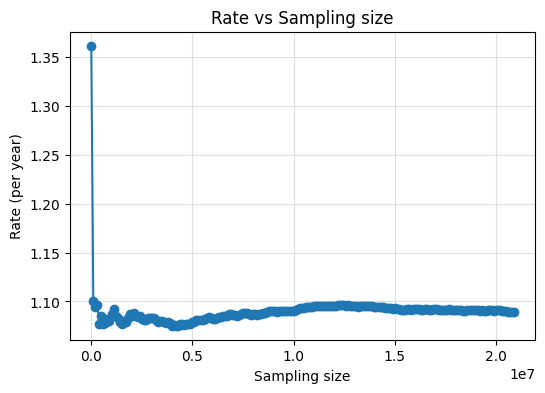

In [ ]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_lensed_detectable_bbh_po_spin_meta.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [ ]:
ler.selecting_n_unlensed_detectable_events(
    size=50000, 
    batch_size=100000,
    snr_threshold=8.,
    output_jsonfile='n_unlensed_detectable_bbh_po_spin.json',meta_data_file='n_unlensed_detectable_bbh_po_spin_meta.json',
    resume=True);

  0%|                                                                     | 0/92470 [00:00<?, ?it/s]

collected number of detectable events =  23737


  0%|                                                                     | 0/92463 [00:00<?, ?it/s]

collected number of detectable events =  24175
total number of events =  5400000
total unlensed rate (yr^-1): 463.45667122752286


  0%|                                                                     | 0/92589 [00:00<?, ?it/s]

collected number of detectable events =  24628
total number of events =  5500000
total unlensed rate (yr^-1): 463.5567085046817


  0%|                                                                     | 0/92541 [00:00<?, ?it/s]

collected number of detectable events =  25038
total number of events =  5600000
total unlensed rate (yr^-1): 462.8582650661211


  0%|                                                                     | 0/92630 [00:00<?, ?it/s]

collected number of detectable events =  25484
total number of events =  5700000
total unlensed rate (yr^-1): 462.8381572353333


  0%|                                                                     | 0/92630 [00:00<?, ?it/s]

collected number of detectable events =  25923
total number of events =  5800000
total unlensed rate (yr^-1): 462.6938013511237


  0%|                                                                     | 0/92563 [00:00<?, ?it/s]

collected number of detectable events =  26387
total number of events =  5900000
total unlensed rate (yr^-1): 462.99299522812464


  0%|                                                                     | 0/92517 [00:00<?, ?it/s]

collected number of detectable events =  26825
total number of events =  6000000
total unlensed rate (yr^-1): 462.8336167574135


  0%|                                                                     | 0/92514 [00:00<?, ?it/s]

collected number of detectable events =  27250
total number of events =  6100000
total unlensed rate (yr^-1): 462.45884124386725


  0%|                                                                     | 0/92745 [00:00<?, ?it/s]

collected number of detectable events =  27719
total number of events =  6200000
total unlensed rate (yr^-1): 462.8308338838497


  0%|                                                                     | 0/92639 [00:00<?, ?it/s]

collected number of detectable events =  28164
total number of events =  6300000
total unlensed rate (yr^-1): 462.796644294352


  0%|                                                                     | 0/92442 [00:00<?, ?it/s]

collected number of detectable events =  28614
total number of events =  6400000
total unlensed rate (yr^-1): 462.84440039247306


  0%|                                                                     | 0/92507 [00:00<?, ?it/s]

collected number of detectable events =  29060
total number of events =  6500000
total unlensed rate (yr^-1): 462.8269806742999


  0%|                                                                     | 0/92645 [00:00<?, ?it/s]

collected number of detectable events =  29497
total number of events =  6600000
total unlensed rate (yr^-1): 462.6689212401398


  0%|                                                                     | 0/92616 [00:00<?, ?it/s]

collected number of detectable events =  29931
total number of events =  6700000
total unlensed rate (yr^-1): 462.4692264622657


  0%|                                                                     | 0/92616 [00:00<?, ?it/s]

collected number of detectable events =  30374
total number of events =  6800000
total unlensed rate (yr^-1): 462.41242065861553


  0%|                                                                     | 0/92606 [00:00<?, ?it/s]

collected number of detectable events =  30831
total number of events =  6900000
total unlensed rate (yr^-1): 462.5673078568115


  0%|                                                                     | 0/92561 [00:00<?, ?it/s]

collected number of detectable events =  31266
total number of events =  7000000
total unlensed rate (yr^-1): 462.392412031547


  0%|                                                                     | 0/92613 [00:00<?, ?it/s]

collected number of detectable events =  31720
total number of events =  7100000
total unlensed rate (yr^-1): 462.4994759527503


  0%|                                                                     | 0/92522 [00:00<?, ?it/s]

collected number of detectable events =  32152
total number of events =  7200000
total unlensed rate (yr^-1): 462.2872459143945


  0%|                                                                     | 0/92590 [00:00<?, ?it/s]

collected number of detectable events =  32591
total number of events =  7300000
total unlensed rate (yr^-1): 462.1800989285969


  0%|                                                                     | 0/92615 [00:00<?, ?it/s]

collected number of detectable events =  33050
total number of events =  7400000
total unlensed rate (yr^-1): 462.3556394196372


  0%|                                                                     | 0/92601 [00:00<?, ?it/s]

collected number of detectable events =  33466
total number of events =  7500000
total unlensed rate (yr^-1): 461.93296755723685


  0%|                                                                     | 0/92594 [00:00<?, ?it/s]

collected number of detectable events =  33928
total number of events =  7600000
total unlensed rate (yr^-1): 462.14800459151985


  0%|                                                                     | 0/92518 [00:00<?, ?it/s]

collected number of detectable events =  34343
total number of events =  7700000
total unlensed rate (yr^-1): 461.72556324323887


  0%|                                                                     | 0/92582 [00:00<?, ?it/s]

collected number of detectable events =  34765
total number of events =  7800000
total unlensed rate (yr^-1): 461.40685888799135


  0%|                                                                     | 0/92529 [00:00<?, ?it/s]

collected number of detectable events =  35201
total number of events =  7900000
total unlensed rate (yr^-1): 461.27968129515625


  0%|                                                                     | 0/92651 [00:00<?, ?it/s]

collected number of detectable events =  35627
total number of events =  8000000
total unlensed rate (yr^-1): 461.02627952142694


  0%|                                                                     | 0/92587 [00:00<?, ?it/s]

collected number of detectable events =  36051
total number of events =  8100000
total unlensed rate (yr^-1): 460.75357337258674


  0%|                                                                     | 0/92526 [00:00<?, ?it/s]

collected number of detectable events =  36491
total number of events =  8200000
total unlensed rate (yr^-1): 460.6895144889807


  0%|                                                                     | 0/92486 [00:00<?, ?it/s]

collected number of detectable events =  36934
total number of events =  8300000
total unlensed rate (yr^-1): 460.6644171073552


  0%|                                                                     | 0/92696 [00:00<?, ?it/s]

collected number of detectable events =  37394
total number of events =  8400000
total unlensed rate (yr^-1): 460.8494279064497


  0%|                                                                     | 0/92543 [00:00<?, ?it/s]

collected number of detectable events =  37830
total number of events =  8500000
total unlensed rate (yr^-1): 460.7377855670093


  0%|                                                                     | 0/92633 [00:00<?, ?it/s]

collected number of detectable events =  38249
total number of events =  8600000
total unlensed rate (yr^-1): 460.4241012771228


  0%|                                                                     | 0/92672 [00:00<?, ?it/s]

collected number of detectable events =  38685
total number of events =  8700000
total unlensed rate (yr^-1): 460.3199142400756


  0%|                                                                     | 0/92591 [00:00<?, ?it/s]

collected number of detectable events =  39133
total number of events =  8800000
total unlensed rate (yr^-1): 460.3592626764685


  0%|                                                                     | 0/92634 [00:00<?, ?it/s]

collected number of detectable events =  39587
total number of events =  8900000
total unlensed rate (yr^-1): 460.46751759512597


  0%|                                                                     | 0/92621 [00:00<?, ?it/s]

collected number of detectable events =  40053
total number of events =  9000000
total unlensed rate (yr^-1): 460.71139737768704


  0%|                                                                     | 0/92451 [00:00<?, ?it/s]

collected number of detectable events =  40485
total number of events =  9100000
total unlensed rate (yr^-1): 460.56312832069193


  0%|                                                                     | 0/92493 [00:00<?, ?it/s]

collected number of detectable events =  40958
total number of events =  9200000
total unlensed rate (yr^-1): 460.8794345431372


  0%|                                                                     | 0/92574 [00:00<?, ?it/s]

collected number of detectable events =  41412
total number of events =  9300000
total unlensed rate (yr^-1): 460.97744009038286


  0%|                                                                     | 0/92587 [00:00<?, ?it/s]

collected number of detectable events =  41807
total number of events =  9400000
total unlensed rate (yr^-1): 460.423589041118


  0%|                                                                     | 0/92510 [00:00<?, ?it/s]

collected number of detectable events =  42279
total number of events =  9500000
total unlensed rate (yr^-1): 460.7204783335267


  0%|                                                                     | 0/92572 [00:00<?, ?it/s]

collected number of detectable events =  42736
total number of events =  9600000
total unlensed rate (yr^-1): 460.84942790644976


  0%|                                                                     | 0/92470 [00:00<?, ?it/s]

collected number of detectable events =  43186
total number of events =  9700000
total unlensed rate (yr^-1): 460.901011480343


  0%|                                                                     | 0/92544 [00:00<?, ?it/s]

collected number of detectable events =  43620
total number of events =  9800000
total unlensed rate (yr^-1): 460.7825253542433


  0%|                                                                     | 0/92647 [00:00<?, ?it/s]

collected number of detectable events =  44085
total number of events =  9900000
total unlensed rate (yr^-1): 460.99059549268435


  0%|                                                                     | 0/92672 [00:00<?, ?it/s]

collected number of detectable events =  44552
total number of events =  10000000
total unlensed rate (yr^-1): 461.2152088076709


  0%|                                                                     | 0/92581 [00:00<?, ?it/s]

collected number of detectable events =  44979
total number of events =  10100000
total unlensed rate (yr^-1): 461.0253826646497


  0%|                                                                     | 0/92498 [00:00<?, ?it/s]

collected number of detectable events =  45400
total number of events =  10200000
total unlensed rate (yr^-1): 460.7783827813513


  0%|                                                                     | 0/92466 [00:00<?, ?it/s]

collected number of detectable events =  45816
total number of events =  10300000
total unlensed rate (yr^-1): 460.4859251790043


  0%|                                                                     | 0/92736 [00:00<?, ?it/s]

collected number of detectable events =  46247
total number of events =  10400000
total unlensed rate (yr^-1): 460.34840363137357


  0%|                                                                     | 0/92649 [00:00<?, ?it/s]

collected number of detectable events =  46736
total number of events =  10500000
total unlensed rate (yr^-1): 460.78534230380995


  0%|                                                                     | 0/92500 [00:00<?, ?it/s]

collected number of detectable events =  47173
total number of events =  10600000
total unlensed rate (yr^-1): 460.70618867848845


  0%|                                                                     | 0/92645 [00:00<?, ?it/s]

collected number of detectable events =  47617
total number of events =  10700000
total unlensed rate (yr^-1): 460.69623981962195


  0%|                                                                     | 0/92630 [00:00<?, ?it/s]

collected number of detectable events =  48112
total number of events =  10800000
total unlensed rate (yr^-1): 461.1753333215839


  0%|                                                                     | 0/92660 [00:00<?, ?it/s]

collected number of detectable events =  48560
total number of events =  10900000
total unlensed rate (yr^-1): 461.19925298507997


  0%|                                                                     | 0/92594 [00:00<?, ?it/s]

collected number of detectable events =  48978
total number of events =  11000000
total unlensed rate (yr^-1): 460.94040257313424


  0%|                                                                     | 0/92450 [00:00<?, ?it/s]

collected number of detectable events =  49453
total number of events =  11100000
total unlensed rate (yr^-1): 461.21782019605286


  0%|                                                                     | 0/92462 [00:00<?, ?it/s]

collected number of detectable events =  49920
total number of events =  11200000
total unlensed rate (yr^-1): 461.416339006725


100%|████████████████████████████████████████████████████████| 92462/92462 [02:14<00:00, 687.11it/s]


collected number of detectable events =  50381
total number of events =  11300000
total unlensed rate (yr^-1): 461.55637630044447
storing detectable unlensed params in ./ler_data/n_unlensed_detectable_bbh_po_spin.json

 trmming final result to size=50000
